## Data discription:

This data covers survyed individual's sleep helath and quality, as well as a list of other information about each individual.
This dataset has 400 observations, and 13 columns, excluding the ID column, it has 12 variables.
the 13 columns (12 variables) are:
- ID: each surveyed individual has an integer ID ranging from 1 to 400. (numerical variable)
- Gender: the gender of a person (two levels: male/female, so categorical variable) 
- Age: age of that person in years. (numerical variable)
- Occupation: that person's occupation. (categorical variable)
- Sleep Duration (hours): The number of hours the person sleeps per day. (numerical variable)
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10. (numerical variable)
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily. (numerical variable)
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10. (numerical variable)
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight). (categorical)
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. (numerical variable)
- Heart Rate (bpm): The resting heart rate of the person in beats per minute. (numerical variable)
- Daily Steps: The number of steps the person takes per day. (numerical variable)
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). (categorical)

#### Note: the data is synthetic and created by the author for illustrative purposes.

#### Pre-selection of variables:
after an initial understanding of each variable, I believe some of them may contain similar/redundant information thus can be discarded.
- since this dataset is aimed to finding relationship between a person's physical habits and their sleep quality, I will first discard gender, because this categorical data does not seem like it would explain much.
- Of course, ID will be discarded.
- Since by science, BMI, heart rate and blood pressure are all related, thus posing the probability of redundancy and multicollinearity, I will only use BMI out of those three and discard the other two. (As a person with higher BMI would have higher blood pressure and heart rate, in general).
- physical activity and daily steps are definitely correlated as well, I will pick physical activity and discard daily steps. 


## Question:
I want to examine the association between a person's sleep (duration/quality) and predictors such as his physical health (namely bmi, physical activity level, etc.) and meantal health (such as sleep disorder, stress level, etc.)
My question is primarily focused on inference, as my goal is to examine association intead of predicting values.

## Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)
library(repr)
library(broom)
library(leaps)
library(moderndive)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# sleep_data <- read_csv("Sleep_health_and_lifestyle_dataset.csv")
# head(sleep_data)
file_url <- "https://drive.google.com/uc?export=download&id=1ZjZvLl5dUzHEF8ouimlTg8t0MorhjzVA"
sleep_data <- read.csv(file_url)
head(sleep_data)

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [8]:
sleep_data|> names()
sleep_data_reduced<- sleep_data|>select(-Person.ID, -Gender, -Blood.Pressure, -Heart.Rate, -Daily.Steps)
#data is reduced as I previously specified
new_names <- c(
  "Age", "Occupation", "Sleep_Duration", 
  "Quality_of_Sleep", "Physical_Activity_Level", "Stress_Level", 
  "BMI_Category",
  "Sleep_Disorder"
)
names(sleep_data_reduced)<- new_names
#this is a step that would help me later, for the previous names with space in between has caused me a lot of 
#trouble already
sleep_data_reduced<- sleep_data_reduced|>mutate(
                                               BMI_Category = as.factor(BMI_Category),
                                               Occupation = as.factor(Occupation))
sleep_data_reduced<- sleep_data_reduced|>mutate(Sleep_Disorder= ifelse(Sleep_Disorder=="None", "False", "True"))
sleep_data_reduced<- sleep_data_reduced|>mutate(Sleep_Disorder = as.factor(Sleep_Disorder))
#since sleep apena and insomnia both negatively affect sleep, I choose to bind them into one category
#I also made BMI_Category, Occupation and Sleep_Disorder into categorical variables
head(sleep_data_reduced) 
nrow(sleep_data_reduced)

[1] "Person.ID"               "Gender"                 
 [3] "Age"                     "Occupation"             
 [5] "Sleep.Duration"          "Quality.of.Sleep"       
 [7] "Physical.Activity.Level" "Stress.Level"           
 [9] "BMI.Category"            "Blood.Pressure"         
[11] "Heart.Rate"              "Daily.Steps"            
[13] "Sleep.Disorder"

,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Sleep_Disorder
,<int>,<fct>,<dbl>,<int>,<int>,<int>,<fct>,<fct>
1,27,Software Engineer,6.1,6,42,6,Overweight,False
2,28,Doctor,6.2,6,60,8,Normal,False
3,28,Doctor,6.2,6,60,8,Normal,False
4,28,Sales Representative,5.9,4,30,8,Obese,True
5,28,Sales Representative,5.9,4,30,8,Obese,True
6,28,Software Engineer,5.9,4,30,8,Obese,True


[1] 374

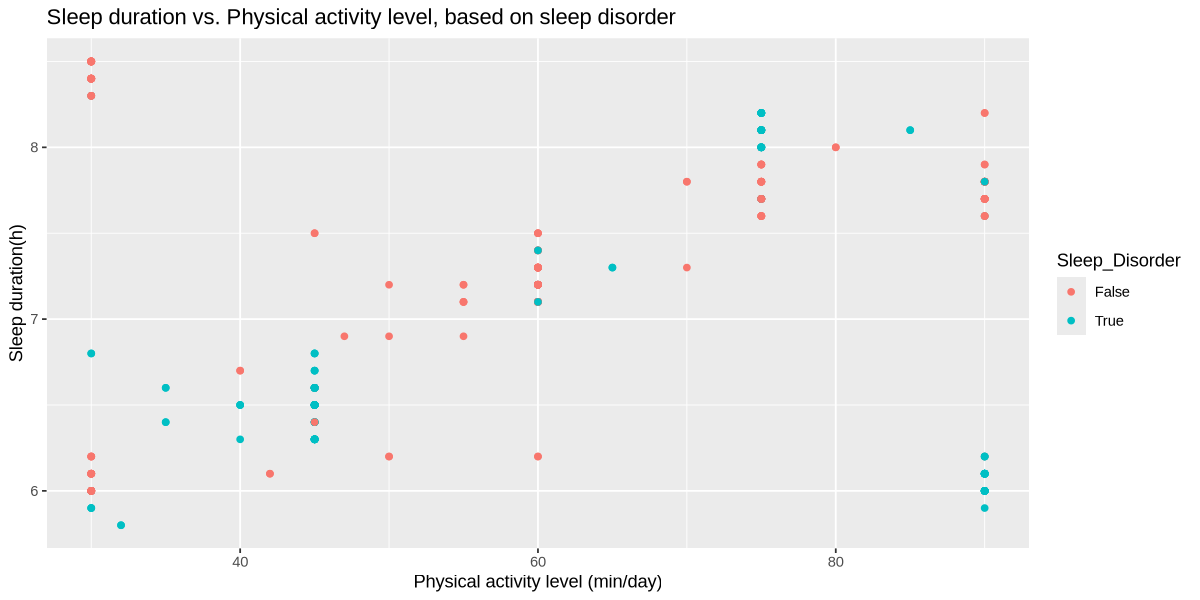

In [9]:
options(repr.plot.width=10, repr.plot.height=5)
visualization1 <- ggplot(sleep_data_reduced, aes(x= Physical_Activity_Level, y= Sleep_Duration,
                                                 color= Sleep_Disorder))+
geom_point()+
labs(x="Physical activity level (min/day)", y= "Sleep duration(h)")+
ggtitle("Sleep duration vs. Physical activity level, based on sleep disorder")
visualization1

In this plot, we see that 
 1. Physical_Activity_Level is positively correlated with Sleep_Duration, which makes sense in real life.
  2. sleep time may not be significantly affected by having sleep disorder or not.

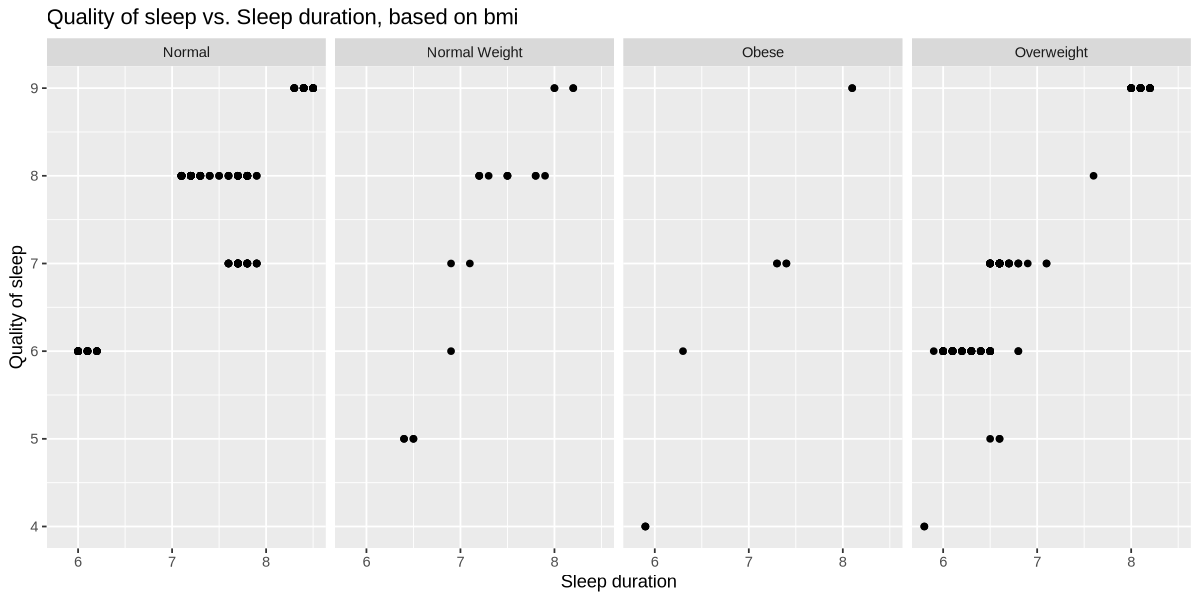

In [10]:
options(repr.plot.width=10, repr.plot.height=5)
visualization2<- ggplot(sleep_data_reduced, aes(x=Sleep_Duration, y=Quality_of_Sleep))+
geom_point()+
facet_grid(~ BMI_Category)+
ggtitle("Quality of sleep vs. Sleep duration, based on bmi")+
labs(x="Sleep duration", y="Quality of sleep")
visualization2

From this plot, we can see that 
1. people at healthier bmi generally have higher quality of sleep
2. sleep duration is positively correlated to sleep quality.

## Methods and Plan
I plan to use a multiple linear regression model to understand the association between a person's sleep duration and his physical health (namely bmi, physical activity level, etc.) and meantal health (such as sleep disorder, stress level, etc.)
#### Assumptions:
- Linear relationship between Sleep duration(response) and the person's physical and mental health(input)
- Errors are independent
- Conditional distribution of the error term is normal
- Variances of the error term are equal
- Furthermore, I will use variable selection methods to minimize the effect of multicollinearity.
#### Potential drawbacks and limitations:
- Even though sleep duration is a continuous variable, the relationship might not be perfectly linear
- Potential issues with our variable selection step.

In [11]:
library(car)
library(MASS)
vif(lm(Sleep_Duration ~., data=sleep_data_reduced))

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,GVIF,Df,GVIF^(1/(2*Df))
Age,7.248862,1,2.692371
Occupation,48.395467,10,1.214060
Quality_of_Sleep,21.853408,1,4.674763
Physical_Activity_Level,1.731149,1,1.315731
Stress_Level,13.929396,1,3.732211
BMI_Category,15.237862,3,1.574541
Sleep_Disorder,3.472088,1,1.863354


We see that there are a couple of high gvif numbers. And since we have categorical variables, I choose to use AIC instead of regular stepwise variable selection.

In [12]:
#Let's first make the training and testing set
set.seed(114514)
library(rsample)
data_split <- sleep_data_reduced|> initial_split(prop=0.7, strata=Sleep_Duration)
sleep_train <- training(data_split)
sleep_test <- testing(data_split)
nrow(sleep_train)
nrow(sleep_test)
##We used a 70/30 for training and testing set

[1] 260

[1] 114

In [13]:
set.seed(114514)
modAIC<- stepAIC(lm(Sleep_Duration ~., data=sleep_train), direction = "backward", k = log(260))
summary(modAIC)
names(coef(modAIC))

Start:  AIC=-607.89
Sleep_Duration ~ Age + Occupation + Quality_of_Sleep + Physical_Activity_Level + 
    Stress_Level + BMI_Category + Sleep_Disorder

                          Df Sum of Sq    RSS     AIC
- Sleep_Disorder           1    0.0760 16.790 -612.27
- Age                      1    0.2274 16.942 -609.94
<none>                                 16.715 -607.89
- BMI_Category             3    1.3931 18.108 -603.76
- Quality_of_Sleep         1    1.2876 18.002 -594.16
- Stress_Level             1    2.0169 18.731 -583.83
- Physical_Activity_Level  1    2.9892 19.704 -570.68
- Occupation              10   12.4060 29.120 -519.16

Step:  AIC=-612.27
Sleep_Duration ~ Age + Occupation + Quality_of_Sleep + Physical_Activity_Level + 
    Stress_Level + BMI_Category

                          Df Sum of Sq    RSS     AIC
- Age                      1    0.2995 17.090 -613.24
<none>                                 16.790 -612.27
- BMI_Category             3    1.3190 18.110 -609.29
- Quality_o


Call:
lm(formula = Sleep_Duration ~ Occupation + Quality_of_Sleep + 
    Physical_Activity_Level + Stress_Level, data = sleep_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6616 -0.1587 -0.0548  0.1616  1.1758 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.700868   0.610355   7.702 3.27e-13 ***
OccupationDoctor                0.691842   0.070974   9.748  < 2e-16 ***
OccupationEngineer              0.578558   0.069607   8.312 6.43e-15 ***
OccupationLawyer                0.289011   0.074591   3.875 0.000137 ***
OccupationManager               0.198861   0.279523   0.711 0.477492    
OccupationNurse                 0.164997   0.070346   2.346 0.019796 *  
OccupationSales Representative  1.003075   0.233007   4.305 2.41e-05 ***
OccupationSalesperson           0.512532   0.087562   5.853 1.53e-08 ***
OccupationScientist             0.350947   0.185691   1.890 0.059941 .  
OccupationSoftware Engineer

[1] "(Intercept)"                    "OccupationDoctor"              
 [3] "OccupationEngineer"             "OccupationLawyer"              
 [5] "OccupationManager"              "OccupationNurse"               
 [7] "OccupationSales Representative" "OccupationSalesperson"         
 [9] "OccupationScientist"            "OccupationSoftware Engineer"   
[11] "OccupationTeacher"              "Quality_of_Sleep"              
[13] "Physical_Activity_Level"        "Stress_Level"

In [17]:
levels(sleep_train$Occupation)
##although the aic did not exactly go as I planned, as in it only gives Occupation as one covariate, but since it gives 10 out of 11 levels in 
##Occupation, I will take the bold yet highly likely guess that the whole Occupation is selected
vif(lm(Sleep_Duration~ Occupation + Quality_of_Sleep + Physical_Activity_Level + Stress_Level, data=sleep_test))
## We see that vif is looking a LOT better!

[1] "Accountant"           "Doctor"               "Engineer"            
 [4] "Lawyer"               "Manager"              "Nurse"               
 [7] "Sales Representative" "Salesperson"          "Scientist"           
[10] "Software Engineer"    "Teacher"

,GVIF,Df,GVIF^(1/(2*Df))
Occupation,4.535298,8,1.099102
Quality_of_Sleep,10.422046,1,3.228319
Physical_Activity_Level,1.596646,1,1.263584
Stress_Level,9.327182,1,3.054044


In [18]:
tidy(lm(Sleep_Duration~ Occupation + Quality_of_Sleep + Physical_Activity_Level + Stress_Level, data=sleep_test))

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.287309510,0.776628340,8.0956478,1.266878e-12
OccupationDoctor,0.758514380,0.119098763,6.3687847,5.547333e-09
OccupationEngineer,0.647082668,0.112509885,5.7513406,9.307889e-08
OccupationLawyer,0.384369968,0.121941123,3.1520947,2.128736e-03
OccupationNurse,0.249098643,0.116127828,2.1450383,3.432375e-02
OccupationSalesperson,0.351817121,0.156218800,2.2520793,2.646026e-02
OccupationScientist,0.563602644,0.346222134,1.6278643,1.066388e-01
OccupationSoftware Engineer,0.342137026,0.206543539,1.6564886,1.006961e-01
OccupationTeacher,-0.126025530,0.135748149,-0.9283775,3.554035e-01


Using the testing set, we see that the p values look very nice, thanks to the earlier variable selection.

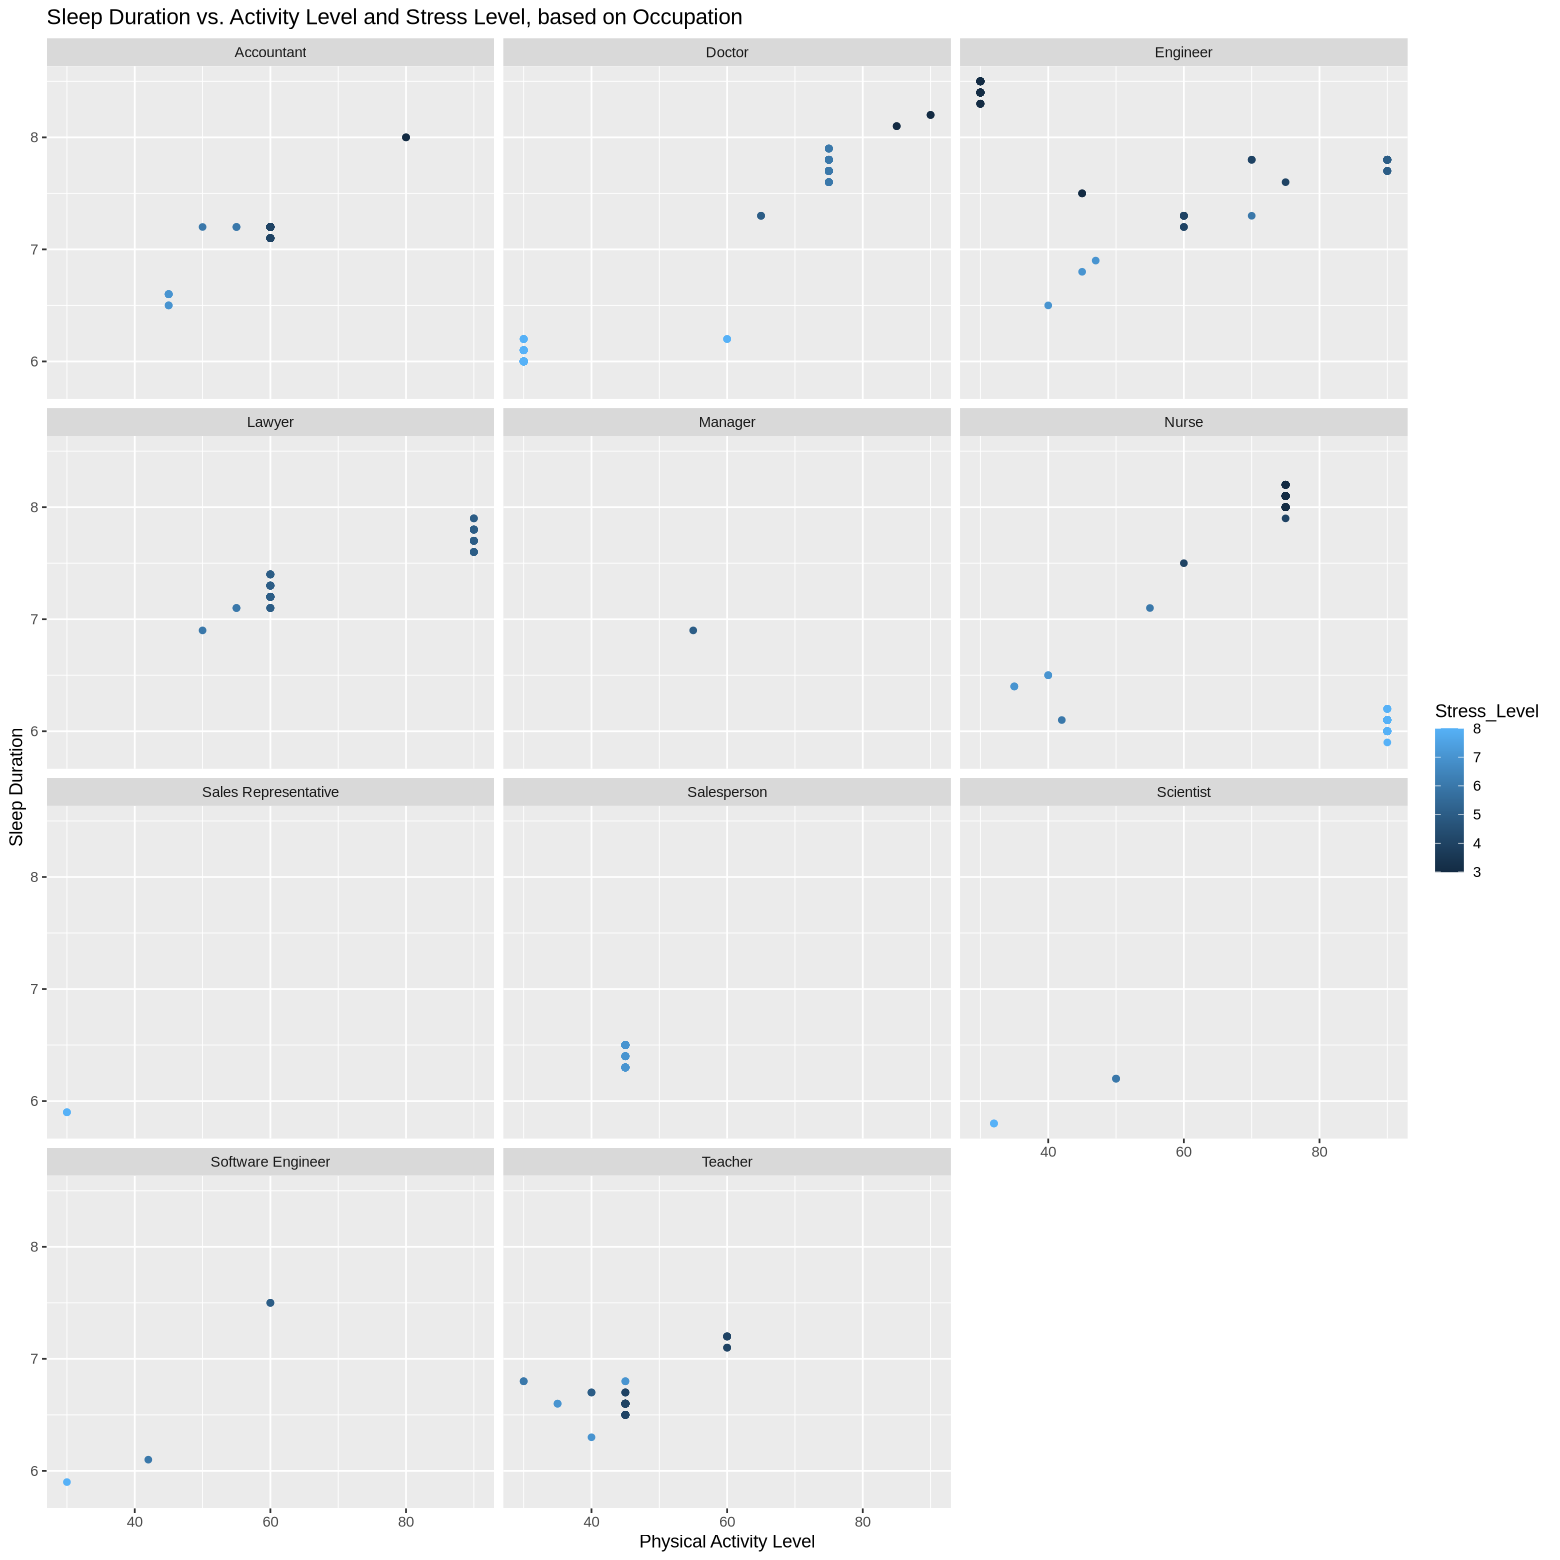

In [19]:
options(repr.plot.width=13, repr.plot.height=13)
visualization3<- ggplot(sleep_data_reduced, aes(x=Physical_Activity_Level, y=Sleep_Duration, color = Stress_Level))+
geom_point()+
facet_wrap(~ Occupation, nrow = 4, ncol=3)+
ggtitle("Sleep Duration vs. Activity Level and Stress Level, based on Occupation")+
labs(x="Physical Activity Level", y="Sleep Duration")
visualization3


We see the general trend that the lower stress level, the longer sleep duration, and the higher physical activity, the longer sleep duration, and we see that occupation definitely plays a role in affecting a person's sleep duration as well